# Fetal Health Classification 

## Vasundhara Bagchi and Veda Singireddy

## Introduction

Through this project, we are aiming to use fetal health data to understand and classify the health of a fetus as Normal, Suspect or Pathological We are doing this using CTG (Cardiotocogram) data.

Classificaton of fetal health into these three criteria is of utmost importance as this helps reduce child and maternal mortality. As per The United Nations' Sustainable Development Goals, reduction of child mortality is a key indicator of human progress. 
The SDGs seek massive reductions in mortality ralte, and aim to have a a neonatal mortality rate of 12 or fewer deaths per 1,000 live births, and an under-five mortality rate of 25 or fewer deaths per 1,000 live births, by 2030. However, more than 5 million children died before their fifth birthday in 2020. 

In a similar light, in lower-income and lower-resource areas, there is still a shocking number of deaths of the mother during, before, and after childbirth due to complications which could be preventable with some fetal moniroting and care. This leads to very high maternal mortality rate, but more importantly the preventable loss of countless lives. 
We aim to try and build a model to move closer to this important goal of reducing child and maternal mortality through classification of CTG data, our primary motivation in choosing this path for our project.  CTG is an easy to use, low-cost, accessible option to get information about the health of a fetus, which allows healthcare providers to work towards diagnosis and choosing the right treatment path to reduce child and maternal mortality. CTG works by sending ultrasound waves in pulses to get data on fetal heart rate, uterine contractions, fetal movements, and more. 

We plan on using the aforementioned data to classify the health of a fetus as Normal, Suspect or Pathological. 



Source credit:
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 
https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9

More information on child mortality health: https://www.who.int/news/item/20-12-2021-latest-child-mortality-estimates-reveal-world-remains-off-track-to-meeting-sustainable-development-goals



## Reading in the Data

**Import Statements**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


**Reading CSV**

In [2]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Understanding the Data


We want to understand the count, center, and spread of our data to get a better idea 

Maybe add violin plot??

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


<AxesSubplot:xlabel='fetal_health', ylabel='uterine_contractions'>

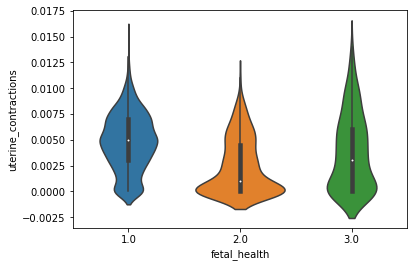

In [4]:
sns.violinplot(x='fetal_health', y='uterine_contractions', data=data)

Looking at our target variable of **fetal health**, let's look at how many classes there are 

In [5]:
data["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

It looks like there are 3 classes - 1.0, 2.0, 3.0

The data is **imbalanced** as it ~78% of its data points are of class 1.0

We can see this with a visualization here: 

<AxesSubplot:>

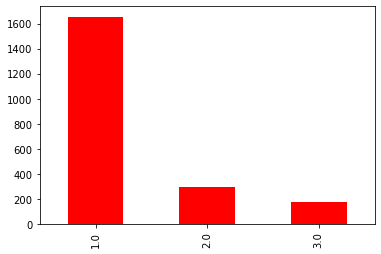

In [6]:
data["fetal_health"].value_counts().plot(kind='bar', color = "red")

We want to understand the correlation of the different columns given in our data, so we can have an **overall correlation table** in the form of a heatmap

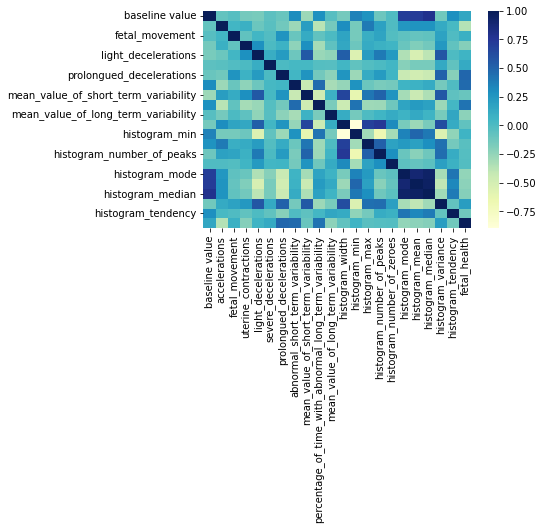

In [7]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
  
# displaying heatmap
plt.show()

More importantly, though, we want to understand the correlation of other columns with our target variable - fetal health 

Let's look at this through data first, then a visualization with a heatmap. 

In [8]:
data.corr()['fetal_health'].sort_values(ascending=False)


fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

<AxesSubplot:>

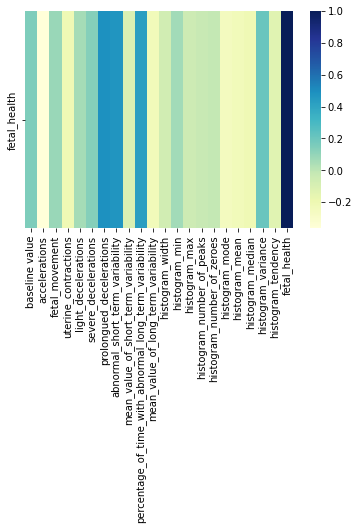

In [9]:
sns.heatmap(data.corr().loc[['fetal_health'],:], cmap="YlGnBu")

We can see from the data and the heatmap that fetal health has a **strong positive correlation** with prolongued_decelerations, abnormal_short_term_variability, and percentage_of_time_with_abnormal_long_term_variability. 



Write about notable correlations of fetal_health with other columns

**Visualizing the spread of the different variables via a histogram** 

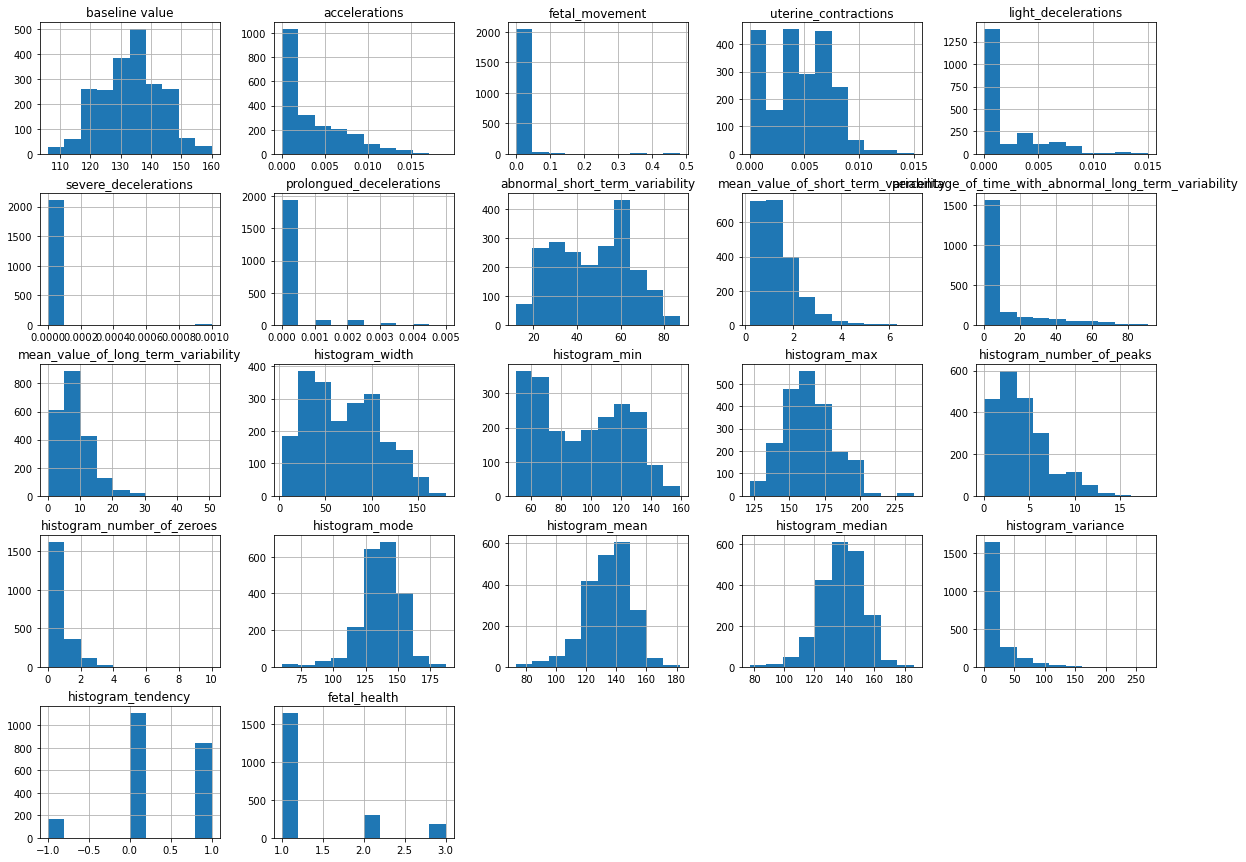

In [10]:
data.hist(figsize=(20,15))
plt.show()
# LATER: change scale so max value of Y is same for all graphs

The severe_decelerations, prolongued_deceleration, and fetal movement columns look very imbalanced to class 1.0. Let's look at the value counts for each of these 

In [11]:
data['severe_decelerations'].unique()
data[['severe_decelerations','fetal_health']].value_counts()
# drop severe_decelerations column because it is zero-inflated and doesn't add value to classification


severe_decelerations  fetal_health
0.000                 1.0             1654
                      2.0              295
                      3.0              170
0.001                 3.0                6
                      1.0                1
dtype: int64

In [12]:
data['prolongued_decelerations'].unique()
data[['prolongued_decelerations','fetal_health']].value_counts() # drop prolongued_decelerations column for same reason

prolongued_decelerations  fetal_health
0.000                     1.0             1586
                          2.0              280
                          3.0               82
0.001                     1.0               54
0.002                     3.0               51
0.003                     3.0               20
0.002                     1.0               14
0.001                     3.0               11
0.004                     3.0                9
0.002                     2.0                7
0.001                     2.0                5
0.003                     2.0                3
0.005                     3.0                3
0.003                     1.0                1
dtype: int64

In [13]:

data[['fetal_movement','fetal_health']].value_counts() # drop fetal_movement column for same reason

fetal_movement  fetal_health
0.000           1.0             1071
                2.0              158
0.001           1.0              125
0.000           3.0               82
0.002           1.0               73
                                ... 
0.009           3.0                1
0.047           1.0                1
0.045           1.0                1
0.011           3.0                1
0.481           1.0                1
Length: 149, dtype: int64

Write about why we drop it - zero-inflated, most of its values are zero

**Visualizing the outliers different columns**

Let's visualize what the spread of these differnt columns look like 

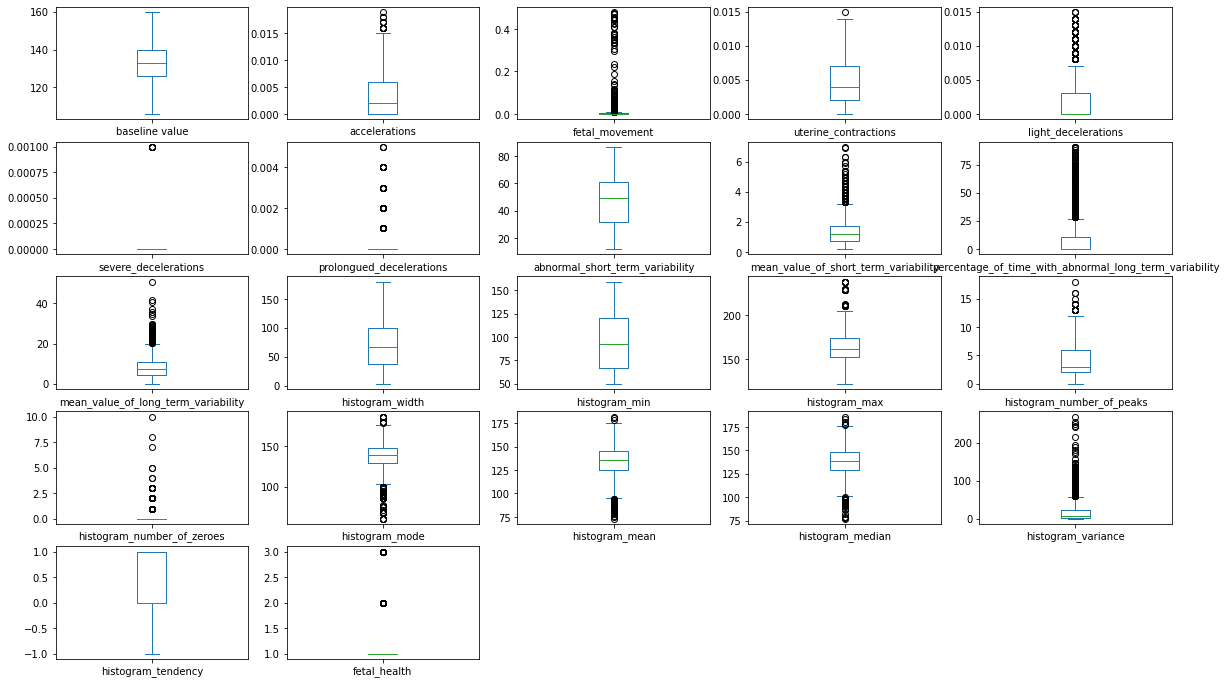

In [14]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) ) 
plt.show()

From the graphs above, we can see that there are visible outliers. As many machine learning models, like linear and logistic regression, are easily impacted by the outliers in the training data, we are removing the rows for each there is an outlier in any column.

**Remove outliers from data based on z-score**


In [15]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Visualizing after outlier removal 

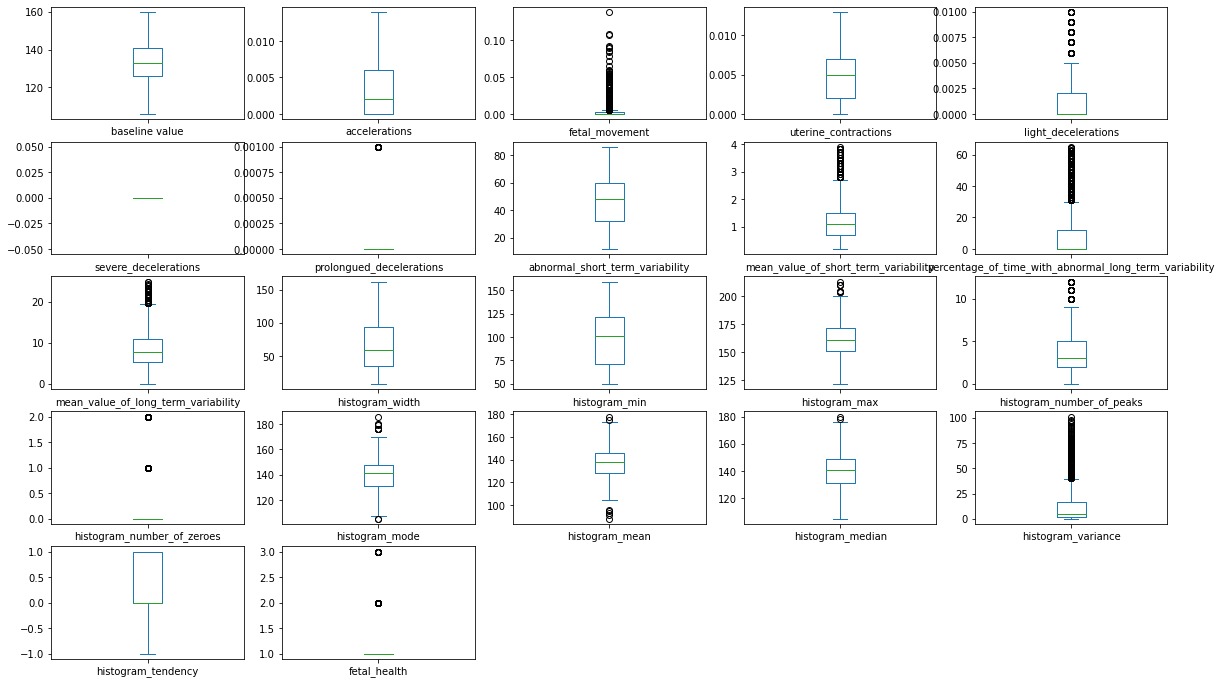

In [16]:
data.plot(kind = "box" , subplots = True , layout= (5,5), figsize =(20,12) )
plt.show()

It is visible that many outliers have been removed as the outliers in the boxplots for each column have decreased

**Dropping the columns**

In [17]:
#data = data.drop(columns=['severe_decelerations', 'prolongued_decelerations'])

In [18]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Preparing the Model

In [19]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1415, 21), (354, 21), (1415,), (354,))

Write a sentence about why we chose to do or not do stratify
(https://datascience.stackexchange.com/questions/40584/meaning-of-stratify-parameter)

## Running the Models

In [20]:
xdata = data.iloc[:,:-1]
ydata =  data.iloc[:,-1]

In [21]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

**Model 1**: KNN 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train.values.ravel())
Y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, Y_pred)

In [23]:
#KNN - 10 fold validation 
kf = KFold(n_splits=10, random_state=None) 
accscore = []
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

for train_index , test_index in kf.split(xdata):
    X_train , X_test = xdata.iloc[train_index],xdata.iloc[test_index]
    y_train , y_test = ydata.iloc[train_index] , ydata.iloc[test_index]
     
    #classifier.fit(X_train,y_train)
    classifier.fit(X_train, y_train.values.ravel())
    y_pred = classifier.predict(X_test)
     
    acc = accuracy_score(y_test, y_pred)
    accscore.append(acc)
     
avgscore = sum(accscore)/10
 
print("Accuracy from each fold using KNN with 5 neighbors = " + str(accscore))
print("Average accuracy using KNN with 5 neighbors = " + str(avgscore))

Accuracy from each fold using KNN with 5 neighbors = [0.8361581920903954, 0.7344632768361582, 0.7966101694915254, 0.807909604519774, 0.9943502824858758, 0.9887005649717514, 0.9209039548022598, 0.8870056497175142, 0.903954802259887, 0.75]
Average accuracy using KNN with 5 neighbors = 0.862005649717514


**Model 2**: SVC 

In [32]:
 # another model
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'linear', random_state = 40)
classifier1.fit(X_train, y_train.values.ravel())
Y_pred = classifier1.predict(X_test)
acc1 = accuracy_score(y_test, Y_pred)
acc1

0.7386363636363636

In [25]:
ydata

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 1769, dtype: float64

In [31]:
#SVM - 10 fold validation 
kf = KFold(n_splits=10, random_state=None) 
accscore = []
classifier1 = SVC(kernel = 'linear', random_state = 40)

for train_index , test_index in kf.split(xdata):
    X_train , X_test = xdata.iloc[train_index],xdata.iloc[test_index]
    y_train , y_test = ydata.iloc[train_index] , ydata.iloc[test_index]
     
    classifier1.fit(X_train, y_train.values.ravel())
    y_pred = classifier1.predict(X_test)
     
    acc = accuracy_score(y_test, y_pred)
    accscore.append(acc)
     
avgscore = sum(accscore)/10
 
print("Accuracy from each fold using SVM = " + str(accscore))
print("Average accuracy using SVM = " + str(avgscore))

Accuracy from each fold using SVM = [0.8192090395480226, 0.711864406779661, 0.847457627118644, 0.8587570621468926, 1.0, 1.0, 0.9096045197740112, 0.8757062146892656, 0.8813559322033898, 0.7386363636363636]
Average accuracy using SVM = 0.8642591165896251


**Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
classifier2.fit(X_train, y_train.values.ravel())
Y_pred = classifier2.predict(X_test)
acc2 = accuracy_score(y_test, Y_pred)
acc2

0.8693181818181818

In [36]:
kf = KFold(n_splits=10, random_state=None) 
accscore = []
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)


for train_index , test_index in kf.split(xdata):
    X_train , X_test = xdata.iloc[train_index],xdata.iloc[test_index]
    y_train , y_test = ydata.iloc[train_index] , ydata.iloc[test_index]
     
    classifier2.fit(X_train, y_train.values.ravel())
    Y_pred = classifier2.predict(X_test)

     
    acc2 = accuracy_score(y_test, Y_pred)
    accscore.append(acc2)
     
avgscore = sum(accscore)/10
 
print("Accuracy from each fold using Random Forest = " + str(accscore))
print("Average accuracy using Random Forest = " + str(avgscore))

Accuracy from each fold using Random Forest = [0.8248587570621468, 0.807909604519774, 0.8531073446327684, 0.8813559322033898, 0.9943502824858758, 0.9943502824858758, 0.9096045197740112, 0.9209039548022598, 0.9096045197740112, 0.8693181818181818]
Average accuracy using Random Forest = 0.8965363379558294


## Results

**Accuracy score:**

**Recall:** 

Recall is more important in this particular scenario because 

## Conclusion 